# Mosquito Habitat Mapper Cleanup
> Prachi Ingle, Matteo Kimura, Pratham Babaria


# Section 0 -- Quick Reference

In [1]:
import logging
import pandas as pd
import numpy as np

from go_utils.download import get_api_data, get_country_api_data
from go_utils import mhm, cleanup, plot

logger = logging.getLogger()
logger.setLevel(logging.INFO)


In [2]:
start_date = "2017-05-31"
end_date = "2021-02-13"
protocol = "mosquito_habitat_mapper"

# Section 1 -- Obtaining the Mosquito Habitat Mapper df + Data Cleanup

## Step 1 - Get the Mosquito Habitat Mapper Data from GLOBE
Allows users to filter GLOBE API Data by `protocol`, `date_range`, `countryNames`, and/OR a `latlon_box`

### Country Filtered Data
**Note:** This tends to take a long time

In [3]:
# Get entries from Brazil and US
mhm_df = get_country_api_data(protocol, start_date, end_date, countries = ["Brazil", "United States"])
mhm_df

,COUNTRY,COUNTRYAFF,ObjectId,SHAPE,countryCode,countryName,createDate,elevation,Latitude,Longitude,...,mosquitohabitatmapperWaterSou_2,mosquitohabitatmapperWaterSourc,organizationId,organizationName,pid,protocol,publishDate,siteId,siteName,updateDate
0,United States,United States,1,"{""x"": -9262911.972109877, ""y"": 5173751.1471916...",USA,United States,2021-03-29 12:34:43,177.4,42.085204,-83.210154,...,still: lake/pond/swamp,pond,13021519.0,Shumate Middle School,187114586,NaN,2021-03-29 13:30:46,50688,17TLG172616,2021-03-29 12:34:43
1,United States,United States,2,"{""x"": -9262911.972109877, ""y"": 5173751.1471916...",USA,United States,2021-03-29 12:34:43,177.4,42.085204,-83.210154,...,still: lake/pond/swamp,pond,13021519.0,Shumate Middle School,187114616,NaN,2021-03-29 13:30:46,50688,17TLG172616,2021-03-29 12:34:43
2,United States,United States,3,"{""x"": -9262911.972109877, ""y"": 5173751.1471916...",USA,United States,2021-03-29 12:34:43,177.4,42.085204,-83.210154,...,still: lake/pond/swamp,pond,13021519.0,Shumate Middle School,187114690,NaN,2021-03-29 13:30:46,50688,17TLG172616,2021-03-29 12:34:43
3,United States,United States,4,"{""x"": -9262911.972109877, ""y"": 5173751.1471916...",USA,United States,2021-03-29 12:34:43,177.4,42.085204,-83.210154,...,still: lake/pond/swamp,pond,13021519.0,Shumate Middle School,187114722,NaN,2021-03-29 13:30:46,50688,17TLG172616,2021-03-29 12:34:43
4,United States,United States,5,"{""x"": -9262911.972109877, ""y"": 5173751.1471916...",USA,United States,2021-03-29 12:34:43,177.4,42.085204,-83.210154,...,still: lake/pond/swamp,pond,13021519.0,Shumate Middle School,187114734,NaN,2021-03-29 13:30:46,50688,17TLG172616,2021-03-29 12:34:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25919,United States,United States,25920,"{""x"": -17570255.320179965, ""y"": 2428555.073207...",None,None,2021-03-29 13:22:28,25.4,21.307269,-157.836289,...,container: artificial,discarded: other,17043304.0,United States of America Citizen Science,187119731,NaN,2021-05-13 21:50:01,228792,04QFJ207566,2021-03-29 13:22:28
25920,United States,United States,25921,"{""x"": -9186862.948779544, ""y"": 3180139.9833497...",USA,United States,2021-03-29 13:22:28,8.0,27.452657,-82.526994,...,still: lake/pond/swamp,pond,13063641.0,GPM Satellite Mission,187119732,NaN,2021-05-13 21:50:01,228809,17RLL491375,2021-03-29 13:22:28
25922,United States,United States,25923,"{""x"": -9186754.523595512, ""y"": 3180481.0743254...",USA,United States,2021-03-29 13:22:28,7.5,27.455376,-82.526020,...,still: lake/pond/swamp,pond,13063641.0,GPM Satellite Mission,187119733,NaN,2021-05-13 21:50:01,228917,17RLL492378,2021-03-29 13:22:28
25923,United States,United States,25924,"{""x"": -17570156.691111125, ""y"": 2427367.054074...",None,None,2021-03-29 13:22:28,6.8,21.297326,-157.835403,...,container: artificial,can or bottle,17043304.0,United States of America Citizen Science,187119734,NaN,2021-05-13 21:50:01,228960,04QFJ208555,2021-03-29 13:22:28


## Data Without Country Enrichment

The following is an example of regular api data without country or regional filtering. You can still filter by latitude and longitude.

In [4]:
#No geographical filtering 
mhm_df = get_api_data(protocol, start_date, end_date)
mhm_df

,protocol,measuredDate,createDate,updateDate,publishDate,organizationId,organizationName,siteId,siteName,countryName,...,mosquitohabitatmapperComments,mosquitohabitatmapperMosquitoPupae,mosquitohabitatmapperWaterSourcePhotoUrls,mosquitohabitatmapperDataSource,mosquitohabitatmapperLarvaFullBodyPhotoUrls,mosquitohabitatmapperMeasurementLatitude,mosquitohabitatmapperLastIdentifyStage,mosquitohabitatmapperWaterSourceType,mosquitohabitatmapperMosquitoHabitatMapperId,mosquitohabitatmapperMeasurementLongitude
0,mosquito_habitat_mapper,2018-11-25,2021-03-29T11:23:16,2021-03-29T11:23:16,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,...,None,False,https://data.globe.gov/system/photos/2018/11/2...,GLOBE Observer App,None,39.253800,None,container: artificial,5188,-77.195900
1,mosquito_habitat_mapper,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,...,None,False,https://data.globe.gov/system/photos/2019/04/0...,GLOBE Observer App,None,39.253600,identify,container: artificial,10360,-77.195600
2,mosquito_habitat_mapper,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,...,None,False,https://data.globe.gov/system/photos/2019/04/0...,GLOBE Observer App,None,39.253500,identify,container: artificial,10365,-77.196000
3,mosquito_habitat_mapper,2019-05-29,2021-03-29T11:47:28,2021-03-29T11:47:28,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,...,None,False,https://data.globe.gov/system/photos/2019/05/2...,GLOBE Observer App,https://data.globe.gov/system/photos/2019/05/2...,39.254200,identify-siphon-pecten,container: artificial,12424,-77.196200
4,mosquito_habitat_mapper,2019-08-04,2021-03-29T12:06:17,2021-03-29T12:06:17,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,...,None,False,https://data.globe.gov/system/photos/2019/08/0...,GLOBE Observer App,None,39.253900,identify,container: artificial,14821,-77.195900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,mosquito_habitat_mapper,2020-03-12,2021-04-22T06:55:18,2021-04-22T06:55:18,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235747,51PTS905216,Philippines,...,None,False,https://data.globe.gov/system/photos/2020/03/1...,GLOBE Observer App,https://data.globe.gov/system/photos/2020/03/1...,14.659925,identify-siphon-shape,container: artificial,28566,121.054859
26079,mosquito_habitat_mapper,2020-03-12,2021-04-22T06:55:20,2021-04-22T06:55:20,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235749,51PTS907218,Philippines,...,None,False,https://data.globe.gov/system/photos/2020/03/1...,GLOBE Observer App,https://data.globe.gov/system/photos/2020/03/1...,14.661651,identify-siphon-shape,container: artificial,28568,121.057413
26080,mosquito_habitat_mapper,2020-03-12,2021-04-22T06:55:21,2021-04-22T06:55:21,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235750,51PTS926252,Philippines,...,None,False,https://data.globe.gov/system/photos/2020/03/1...,GLOBE Observer App,https://data.globe.gov/system/photos/2020/03/1...,14.692925,identify-siphon-shape,container: artificial,28569,121.074205
26081,mosquito_habitat_mapper,2020-03-12,2021-04-22T06:55:22,2021-04-22T06:55:22,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235751,51PTS932252,Philippines,...,None,False,https://data.globe.gov/system/photos/2020/03/1...,GLOBE Observer App,https://data.globe.gov/system/photos/2020/03/1...,14.692600,identify-siphon-shape,container: artificial,28570,121.080200


## Step 2 -- Data Cleanup

In [5]:
cleanup.remove_homogenous_cols(mhm_df)
mhm_df

INFO:root:Dropped: mosquito_habitat_mapper
INFO:root:Dropped: None
INFO:root:Dropped: None
INFO:root:Dropped: GLOBE Observer App


,measuredDate,createDate,updateDate,publishDate,organizationId,organizationName,siteId,siteName,countryName,countryCode,...,mosquitohabitatmapperSpecies,mosquitohabitatmapperComments,mosquitohabitatmapperMosquitoPupae,mosquitohabitatmapperWaterSourcePhotoUrls,mosquitohabitatmapperLarvaFullBodyPhotoUrls,mosquitohabitatmapperMeasurementLatitude,mosquitohabitatmapperLastIdentifyStage,mosquitohabitatmapperWaterSourceType,mosquitohabitatmapperMosquitoHabitatMapperId,mosquitohabitatmapperMeasurementLongitude
0,2018-11-25,2021-03-29T11:23:16,2021-03-29T11:23:16,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,None,None,False,https://data.globe.gov/system/photos/2018/11/2...,None,39.253800,None,container: artificial,5188,-77.195900
1,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,None,None,False,https://data.globe.gov/system/photos/2019/04/0...,None,39.253600,identify,container: artificial,10360,-77.195600
2,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,None,None,False,https://data.globe.gov/system/photos/2019/04/0...,None,39.253500,identify,container: artificial,10365,-77.196000
3,2019-05-29,2021-03-29T11:47:28,2021-03-29T11:47:28,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,None,None,False,https://data.globe.gov/system/photos/2019/05/2...,https://data.globe.gov/system/photos/2019/05/2...,39.254200,identify-siphon-pecten,container: artificial,12424,-77.196200
4,2019-08-04,2021-03-29T12:06:17,2021-03-29T12:06:17,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,None,None,False,https://data.globe.gov/system/photos/2019/08/0...,None,39.253900,identify,container: artificial,14821,-77.195900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,2020-03-12,2021-04-22T06:55:18,2021-04-22T06:55:18,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235747,51PTS905216,Philippines,PHL,...,None,None,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.659925,identify-siphon-shape,container: artificial,28566,121.054859
26079,2020-03-12,2021-04-22T06:55:20,2021-04-22T06:55:20,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235749,51PTS907218,Philippines,PHL,...,None,None,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.661651,identify-siphon-shape,container: artificial,28568,121.057413
26080,2020-03-12,2021-04-22T06:55:21,2021-04-22T06:55:21,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235750,51PTS926252,Philippines,PHL,...,None,None,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.692925,identify-siphon-shape,container: artificial,28569,121.074205
26081,2020-03-12,2021-04-22T06:55:22,2021-04-22T06:55:22,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235751,51PTS932252,Philippines,PHL,...,None,None,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.692600,identify-siphon-shape,container: artificial,28570,121.080200


In [6]:
cleanup.standardize_null_vals(mhm_df, np.nan)
mhm_df

,measuredDate,createDate,updateDate,publishDate,organizationId,organizationName,siteId,siteName,countryName,countryCode,...,mosquitohabitatmapperSpecies,mosquitohabitatmapperComments,mosquitohabitatmapperMosquitoPupae,mosquitohabitatmapperWaterSourcePhotoUrls,mosquitohabitatmapperLarvaFullBodyPhotoUrls,mosquitohabitatmapperMeasurementLatitude,mosquitohabitatmapperLastIdentifyStage,mosquitohabitatmapperWaterSourceType,mosquitohabitatmapperMosquitoHabitatMapperId,mosquitohabitatmapperMeasurementLongitude
0,2018-11-25,2021-03-29T11:23:16,2021-03-29T11:23:16,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,NaN,NaN,False,https://data.globe.gov/system/photos/2018/11/2...,NaN,39.253800,NaN,container: artificial,5188,-77.195900
1,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,NaN,NaN,False,https://data.globe.gov/system/photos/2019/04/0...,NaN,39.253600,identify,container: artificial,10360,-77.195600
2,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,NaN,NaN,False,https://data.globe.gov/system/photos/2019/04/0...,NaN,39.253500,identify,container: artificial,10365,-77.196000
3,2019-05-29,2021-03-29T11:47:28,2021-03-29T11:47:28,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,NaN,NaN,False,https://data.globe.gov/system/photos/2019/05/2...,https://data.globe.gov/system/photos/2019/05/2...,39.254200,identify-siphon-pecten,container: artificial,12424,-77.196200
4,2019-08-04,2021-03-29T12:06:17,2021-03-29T12:06:17,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,NaN,NaN,False,https://data.globe.gov/system/photos/2019/08/0...,NaN,39.253900,identify,container: artificial,14821,-77.195900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,2020-03-12,2021-04-22T06:55:18,2021-04-22T06:55:18,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235747,51PTS905216,Philippines,PHL,...,NaN,NaN,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.659925,identify-siphon-shape,container: artificial,28566,121.054859
26079,2020-03-12,2021-04-22T06:55:20,2021-04-22T06:55:20,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235749,51PTS907218,Philippines,PHL,...,NaN,NaN,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.661651,identify-siphon-shape,container: artificial,28568,121.057413
26080,2020-03-12,2021-04-22T06:55:21,2021-04-22T06:55:21,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235750,51PTS926252,Philippines,PHL,...,NaN,NaN,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.692925,identify-siphon-shape,container: artificial,28569,121.074205
26081,2020-03-12,2021-04-22T06:55:22,2021-04-22T06:55:22,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235751,51PTS932252,Philippines,PHL,...,NaN,NaN,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.692600,identify-siphon-shape,container: artificial,28570,121.080200


In [7]:
cleanup.rename_latlon_cols(mhm_df)
mhm_df

,measuredDate,createDate,updateDate,publishDate,organizationId,organizationName,siteId,siteName,countryName,countryCode,...,mosquitohabitatmapperSpecies,mosquitohabitatmapperComments,mosquitohabitatmapperMosquitoPupae,mosquitohabitatmapperWaterSourcePhotoUrls,mosquitohabitatmapperLarvaFullBodyPhotoUrls,Latitude,mosquitohabitatmapperLastIdentifyStage,mosquitohabitatmapperWaterSourceType,mosquitohabitatmapperMosquitoHabitatMapperId,Longitude
0,2018-11-25,2021-03-29T11:23:16,2021-03-29T11:23:16,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,NaN,NaN,False,https://data.globe.gov/system/photos/2018/11/2...,NaN,39.253800,NaN,container: artificial,5188,-77.195900
1,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,NaN,NaN,False,https://data.globe.gov/system/photos/2019/04/0...,NaN,39.253600,identify,container: artificial,10360,-77.195600
2,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,NaN,NaN,False,https://data.globe.gov/system/photos/2019/04/0...,NaN,39.253500,identify,container: artificial,10365,-77.196000
3,2019-05-29,2021-03-29T11:47:28,2021-03-29T11:47:28,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,NaN,NaN,False,https://data.globe.gov/system/photos/2019/05/2...,https://data.globe.gov/system/photos/2019/05/2...,39.254200,identify-siphon-pecten,container: artificial,12424,-77.196200
4,2019-08-04,2021-03-29T12:06:17,2021-03-29T12:06:17,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,NaN,NaN,False,https://data.globe.gov/system/photos/2019/08/0...,NaN,39.253900,identify,container: artificial,14821,-77.195900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,2020-03-12,2021-04-22T06:55:18,2021-04-22T06:55:18,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235747,51PTS905216,Philippines,PHL,...,NaN,NaN,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.659925,identify-siphon-shape,container: artificial,28566,121.054859
26079,2020-03-12,2021-04-22T06:55:20,2021-04-22T06:55:20,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235749,51PTS907218,Philippines,PHL,...,NaN,NaN,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.661651,identify-siphon-shape,container: artificial,28568,121.057413
26080,2020-03-12,2021-04-22T06:55:21,2021-04-22T06:55:21,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235750,51PTS926252,Philippines,PHL,...,NaN,NaN,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.692925,identify-siphon-shape,container: artificial,28569,121.074205
26081,2020-03-12,2021-04-22T06:55:22,2021-04-22T06:55:22,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235751,51PTS932252,Philippines,PHL,...,NaN,NaN,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.692600,identify-siphon-shape,container: artificial,28570,121.080200


In [8]:
mhm.cleanup_column_prefix(mhm_df)
mhm_df

,mhm_measuredDate,mhm_createDate,mhm_updateDate,mhm_publishDate,mhm_organizationId,mhm_organizationName,mhm_siteId,mhm_siteName,mhm_countryName,mhm_countryCode,...,mhm_Species,mhm_Comments,mhm_MosquitoPupae,mhm_WaterSourcePhotoUrls,mhm_LarvaFullBodyPhotoUrls,mhm_Latitude,mhm_LastIdentifyStage,mhm_WaterSourceType,mhm_MosquitoHabitatMapperId,mhm_Longitude
0,2018-11-25,2021-03-29T11:23:16,2021-03-29T11:23:16,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,NaN,NaN,False,https://data.globe.gov/system/photos/2018/11/2...,NaN,39.253800,NaN,container: artificial,5188,-77.195900
1,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,NaN,NaN,False,https://data.globe.gov/system/photos/2019/04/0...,NaN,39.253600,identify,container: artificial,10360,-77.195600
2,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,NaN,NaN,False,https://data.globe.gov/system/photos/2019/04/0...,NaN,39.253500,identify,container: artificial,10365,-77.196000
3,2019-05-29,2021-03-29T11:47:28,2021-03-29T11:47:28,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,NaN,NaN,False,https://data.globe.gov/system/photos/2019/05/2...,https://data.globe.gov/system/photos/2019/05/2...,39.254200,identify-siphon-pecten,container: artificial,12424,-77.196200
4,2019-08-04,2021-03-29T12:06:17,2021-03-29T12:06:17,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,NaN,NaN,False,https://data.globe.gov/system/photos/2019/08/0...,NaN,39.253900,identify,container: artificial,14821,-77.195900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,2020-03-12,2021-04-22T06:55:18,2021-04-22T06:55:18,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235747,51PTS905216,Philippines,PHL,...,NaN,NaN,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.659925,identify-siphon-shape,container: artificial,28566,121.054859
26079,2020-03-12,2021-04-22T06:55:20,2021-04-22T06:55:20,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235749,51PTS907218,Philippines,PHL,...,NaN,NaN,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.661651,identify-siphon-shape,container: artificial,28568,121.057413
26080,2020-03-12,2021-04-22T06:55:21,2021-04-22T06:55:21,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235750,51PTS926252,Philippines,PHL,...,NaN,NaN,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.692925,identify-siphon-shape,container: artificial,28569,121.074205
26081,2020-03-12,2021-04-22T06:55:22,2021-04-22T06:55:22,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235751,51PTS932252,Philippines,PHL,...,NaN,NaN,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.692600,identify-siphon-shape,container: artificial,28570,121.080200


In [9]:
mhm.larvae_to_num(mhm_df)
mhm_df

,mhm_measuredDate,mhm_createDate,mhm_updateDate,mhm_publishDate,mhm_organizationId,mhm_organizationName,mhm_siteId,mhm_siteName,mhm_countryName,mhm_countryCode,...,mhm_MosquitoPupae,mhm_WaterSourcePhotoUrls,mhm_LarvaFullBodyPhotoUrls,mhm_Latitude,mhm_LastIdentifyStage,mhm_WaterSourceType,mhm_MosquitoHabitatMapperId,mhm_Longitude,mhm_LarvaeCountMagnitude,mhm_LarvaeCountIsRangeFlag
0,2018-11-25,2021-03-29T11:23:16,2021-03-29T11:23:16,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,False,https://data.globe.gov/system/photos/2018/11/2...,NaN,39.253800,NaN,container: artificial,5188,-77.195900,0,0
1,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,False,https://data.globe.gov/system/photos/2019/04/0...,NaN,39.253600,identify,container: artificial,10360,-77.195600,0,0
2,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,False,https://data.globe.gov/system/photos/2019/04/0...,NaN,39.253500,identify,container: artificial,10365,-77.196000,0,0
3,2019-05-29,2021-03-29T11:47:28,2021-03-29T11:47:28,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,False,https://data.globe.gov/system/photos/2019/05/2...,https://data.globe.gov/system/photos/2019/05/2...,39.254200,identify-siphon-pecten,container: artificial,12424,-77.196200,0,0
4,2019-08-04,2021-03-29T12:06:17,2021-03-29T12:06:17,2021-03-29T13:30:46,13063641.0,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,False,https://data.globe.gov/system/photos/2019/08/0...,NaN,39.253900,identify,container: artificial,14821,-77.195900,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,2020-03-12,2021-04-22T06:55:18,2021-04-22T06:55:18,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235747,51PTS905216,Philippines,PHL,...,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.659925,identify-siphon-shape,container: artificial,28566,121.054859,0,0
26079,2020-03-12,2021-04-22T06:55:20,2021-04-22T06:55:20,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235749,51PTS907218,Philippines,PHL,...,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.661651,identify-siphon-shape,container: artificial,28568,121.057413,0,0
26080,2020-03-12,2021-04-22T06:55:21,2021-04-22T06:55:21,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235750,51PTS926252,Philippines,PHL,...,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.692925,identify-siphon-shape,container: artificial,28569,121.074205,0,0
26081,2020-03-12,2021-04-22T06:55:22,2021-04-22T06:55:22,2021-04-22T07:00:00,24273816.0,Batasan Hills National High School,235751,51PTS932252,Philippines,PHL,...,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.692600,identify-siphon-shape,container: artificial,28570,121.080200,0,0


In [10]:
cleanup.round_cols(mhm_df)
mhm_df

INFO:root:Converted to integer: mhm_organizationId
INFO:root:Converted to integer: mhm_siteId
INFO:root:Rounded to 5 decimals: mhm_MGRSLatitude
INFO:root:Rounded to 5 decimals: mhm_MGRSLongitude
INFO:root:Converted to integer: mhm_elevation
INFO:root:Converted to integer: mhm_pid
INFO:root:Converted to integer: mhm_MeasurementElevation
INFO:root:Converted to integer: mhm_Userid
INFO:root:Converted to integer: mhm_LarvaeCount
INFO:root:Rounded to 5 decimals: mhm_Latitude
INFO:root:Converted to integer: mhm_MosquitoHabitatMapperId
INFO:root:Rounded to 5 decimals: mhm_Longitude
INFO:root:Converted to integer: mhm_LarvaeCountMagnitude
INFO:root:Converted to integer: mhm_LarvaeCountIsRangeFlag


,mhm_measuredDate,mhm_createDate,mhm_updateDate,mhm_publishDate,mhm_organizationId,mhm_organizationName,mhm_siteId,mhm_siteName,mhm_countryName,mhm_countryCode,...,mhm_MosquitoPupae,mhm_WaterSourcePhotoUrls,mhm_LarvaFullBodyPhotoUrls,mhm_Latitude,mhm_LastIdentifyStage,mhm_WaterSourceType,mhm_MosquitoHabitatMapperId,mhm_Longitude,mhm_LarvaeCountMagnitude,mhm_LarvaeCountIsRangeFlag
0,2018-11-25,2021-03-29T11:23:16,2021-03-29T11:23:16,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,False,https://data.globe.gov/system/photos/2018/11/2...,NaN,39.25380,NaN,container: artificial,5188,-77.19590,0,0
1,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,False,https://data.globe.gov/system/photos/2019/04/0...,NaN,39.25360,identify,container: artificial,10360,-77.19560,0,0
2,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,False,https://data.globe.gov/system/photos/2019/04/0...,NaN,39.25350,identify,container: artificial,10365,-77.19600,0,0
3,2019-05-29,2021-03-29T11:47:28,2021-03-29T11:47:28,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,False,https://data.globe.gov/system/photos/2019/05/2...,https://data.globe.gov/system/photos/2019/05/2...,39.25420,identify-siphon-pecten,container: artificial,12424,-77.19620,0,0
4,2019-08-04,2021-03-29T12:06:17,2021-03-29T12:06:17,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,False,https://data.globe.gov/system/photos/2019/08/0...,NaN,39.25390,identify,container: artificial,14821,-77.19590,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,2020-03-12,2021-04-22T06:55:18,2021-04-22T06:55:18,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235747,51PTS905216,Philippines,PHL,...,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.65992,identify-siphon-shape,container: artificial,28566,121.05486,0,0
26079,2020-03-12,2021-04-22T06:55:20,2021-04-22T06:55:20,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235749,51PTS907218,Philippines,PHL,...,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.66165,identify-siphon-shape,container: artificial,28568,121.05741,0,0
26080,2020-03-12,2021-04-22T06:55:21,2021-04-22T06:55:21,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235750,51PTS926252,Philippines,PHL,...,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.69293,identify-siphon-shape,container: artificial,28569,121.07421,0,0
26081,2020-03-12,2021-04-22T06:55:22,2021-04-22T06:55:22,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235751,51PTS932252,Philippines,PHL,...,False,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.69260,identify-siphon-shape,container: artificial,28570,121.08020,0,0


# Section 2 -- QA Flags

* General Flags
 * `mhm_HasGenus`, `mhm_IsGenusOfInterest`, `mhm_IsWatersourceContainer`
* Photo QA Flags
 * `mhm_PhotoCount`, `mhm_RejectedCount`, `mhm_PendingCount`
 * `mhm_PhotoBitBinary`, `mhm_PhotoBitDecimal`
* Completeness Scores
 * `mhm_SubCompletenessScore`
 * `mhm_CumulativeCompletenessScore`

## General Flags
* `mhm_HasGenus` - Bit Flag that indicates whether the MHM Observation recorded a Genus Type
* `mhm_IsGenusOfInterest` - Bit flag that indicates whether the Genus is any of the following types: `["Aedes", "Anopheles", "Culex"]`
* `mhm_IsWatersourceContainer` - Bit flag that indicates if water source was a type of container (**NOT** `["puddle", "still water", "stream", "estuary", "lake", "pond",  "ditch", "bay",  "ocean", "swamp", "wetland"]`)


### **`mhm_HasGenus`**

In [11]:
mhm.has_genus_flag(mhm_df, "mhm_Genus")
mhm_df

,mhm_measuredDate,mhm_createDate,mhm_updateDate,mhm_publishDate,mhm_organizationId,mhm_organizationName,mhm_siteId,mhm_siteName,mhm_countryName,mhm_countryCode,...,mhm_WaterSourcePhotoUrls,mhm_LarvaFullBodyPhotoUrls,mhm_Latitude,mhm_LastIdentifyStage,mhm_WaterSourceType,mhm_MosquitoHabitatMapperId,mhm_Longitude,mhm_LarvaeCountMagnitude,mhm_LarvaeCountIsRangeFlag,mhm_HasGenus
0,2018-11-25,2021-03-29T11:23:16,2021-03-29T11:23:16,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,https://data.globe.gov/system/photos/2018/11/2...,NaN,39.25380,NaN,container: artificial,5188,-77.19590,0,0,0
1,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,https://data.globe.gov/system/photos/2019/04/0...,NaN,39.25360,identify,container: artificial,10360,-77.19560,0,0,0
2,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,https://data.globe.gov/system/photos/2019/04/0...,NaN,39.25350,identify,container: artificial,10365,-77.19600,0,0,0
3,2019-05-29,2021-03-29T11:47:28,2021-03-29T11:47:28,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,https://data.globe.gov/system/photos/2019/05/2...,https://data.globe.gov/system/photos/2019/05/2...,39.25420,identify-siphon-pecten,container: artificial,12424,-77.19620,0,0,0
4,2019-08-04,2021-03-29T12:06:17,2021-03-29T12:06:17,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,https://data.globe.gov/system/photos/2019/08/0...,NaN,39.25390,identify,container: artificial,14821,-77.19590,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,2020-03-12,2021-04-22T06:55:18,2021-04-22T06:55:18,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235747,51PTS905216,Philippines,PHL,...,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.65992,identify-siphon-shape,container: artificial,28566,121.05486,0,0,0
26079,2020-03-12,2021-04-22T06:55:20,2021-04-22T06:55:20,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235749,51PTS907218,Philippines,PHL,...,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.66165,identify-siphon-shape,container: artificial,28568,121.05741,0,0,0
26080,2020-03-12,2021-04-22T06:55:21,2021-04-22T06:55:21,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235750,51PTS926252,Philippines,PHL,...,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.69293,identify-siphon-shape,container: artificial,28569,121.07421,0,0,0
26081,2020-03-12,2021-04-22T06:55:22,2021-04-22T06:55:22,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235751,51PTS932252,Philippines,PHL,...,https://data.globe.gov/system/photos/2020/03/1...,https://data.globe.gov/system/photos/2020/03/1...,14.69260,identify-siphon-shape,container: artificial,28570,121.08020,0,0,0


### **`mhm_IsGenusOfInterest`**

In [12]:
mhm.infectious_genus_flag(mhm_df, "mhm_Genus")
mhm_df

,mhm_measuredDate,mhm_createDate,mhm_updateDate,mhm_publishDate,mhm_organizationId,mhm_organizationName,mhm_siteId,mhm_siteName,mhm_countryName,mhm_countryCode,...,mhm_LarvaFullBodyPhotoUrls,mhm_Latitude,mhm_LastIdentifyStage,mhm_WaterSourceType,mhm_MosquitoHabitatMapperId,mhm_Longitude,mhm_LarvaeCountMagnitude,mhm_LarvaeCountIsRangeFlag,mhm_HasGenus,mhm_IsGenusOfInterest
0,2018-11-25,2021-03-29T11:23:16,2021-03-29T11:23:16,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,NaN,39.25380,NaN,container: artificial,5188,-77.19590,0,0,0,0
1,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,NaN,39.25360,identify,container: artificial,10360,-77.19560,0,0,0,0
2,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,NaN,39.25350,identify,container: artificial,10365,-77.19600,0,0,0,0
3,2019-05-29,2021-03-29T11:47:28,2021-03-29T11:47:28,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,https://data.globe.gov/system/photos/2019/05/2...,39.25420,identify-siphon-pecten,container: artificial,12424,-77.19620,0,0,0,0
4,2019-08-04,2021-03-29T12:06:17,2021-03-29T12:06:17,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,NaN,39.25390,identify,container: artificial,14821,-77.19590,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,2020-03-12,2021-04-22T06:55:18,2021-04-22T06:55:18,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235747,51PTS905216,Philippines,PHL,...,https://data.globe.gov/system/photos/2020/03/1...,14.65992,identify-siphon-shape,container: artificial,28566,121.05486,0,0,0,0
26079,2020-03-12,2021-04-22T06:55:20,2021-04-22T06:55:20,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235749,51PTS907218,Philippines,PHL,...,https://data.globe.gov/system/photos/2020/03/1...,14.66165,identify-siphon-shape,container: artificial,28568,121.05741,0,0,0,0
26080,2020-03-12,2021-04-22T06:55:21,2021-04-22T06:55:21,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235750,51PTS926252,Philippines,PHL,...,https://data.globe.gov/system/photos/2020/03/1...,14.69293,identify-siphon-shape,container: artificial,28569,121.07421,0,0,0,0
26081,2020-03-12,2021-04-22T06:55:22,2021-04-22T06:55:22,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235751,51PTS932252,Philippines,PHL,...,https://data.globe.gov/system/photos/2020/03/1...,14.69260,identify-siphon-shape,container: artificial,28570,121.08020,0,0,0,0


### **`mhm_IsWatersourceContainer`**

In [13]:
mhm.is_container_flag(mhm_df, "mhm_WaterSource")
mhm_df

,mhm_measuredDate,mhm_createDate,mhm_updateDate,mhm_publishDate,mhm_organizationId,mhm_organizationName,mhm_siteId,mhm_siteName,mhm_countryName,mhm_countryCode,...,mhm_Latitude,mhm_LastIdentifyStage,mhm_WaterSourceType,mhm_MosquitoHabitatMapperId,mhm_Longitude,mhm_LarvaeCountMagnitude,mhm_LarvaeCountIsRangeFlag,mhm_HasGenus,mhm_IsGenusOfInterest,mhm_IsWaterSourceContainer
0,2018-11-25,2021-03-29T11:23:16,2021-03-29T11:23:16,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,39.25380,NaN,container: artificial,5188,-77.19590,0,0,0,0,1
1,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,39.25360,identify,container: artificial,10360,-77.19560,0,0,0,0,1
2,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,39.25350,identify,container: artificial,10365,-77.19600,0,0,0,0,1
3,2019-05-29,2021-03-29T11:47:28,2021-03-29T11:47:28,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,39.25420,identify-siphon-pecten,container: artificial,12424,-77.19620,0,0,0,0,1
4,2019-08-04,2021-03-29T12:06:17,2021-03-29T12:06:17,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,39.25390,identify,container: artificial,14821,-77.19590,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,2020-03-12,2021-04-22T06:55:18,2021-04-22T06:55:18,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235747,51PTS905216,Philippines,PHL,...,14.65992,identify-siphon-shape,container: artificial,28566,121.05486,0,0,0,0,1
26079,2020-03-12,2021-04-22T06:55:20,2021-04-22T06:55:20,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235749,51PTS907218,Philippines,PHL,...,14.66165,identify-siphon-shape,container: artificial,28568,121.05741,0,0,0,0,1
26080,2020-03-12,2021-04-22T06:55:21,2021-04-22T06:55:21,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235750,51PTS926252,Philippines,PHL,...,14.69293,identify-siphon-shape,container: artificial,28569,121.07421,0,0,0,0,1
26081,2020-03-12,2021-04-22T06:55:22,2021-04-22T06:55:22,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235751,51PTS932252,Philippines,PHL,...,14.69260,identify-siphon-shape,container: artificial,28570,121.08020,0,0,0,0,1


### **`mhm_HasWatersource`**

In [14]:
mhm.has_watersource_flag(mhm_df, "mhm_WaterSource")
mhm_df

,mhm_measuredDate,mhm_createDate,mhm_updateDate,mhm_publishDate,mhm_organizationId,mhm_organizationName,mhm_siteId,mhm_siteName,mhm_countryName,mhm_countryCode,...,mhm_LastIdentifyStage,mhm_WaterSourceType,mhm_MosquitoHabitatMapperId,mhm_Longitude,mhm_LarvaeCountMagnitude,mhm_LarvaeCountIsRangeFlag,mhm_HasGenus,mhm_IsGenusOfInterest,mhm_IsWaterSourceContainer,mhm_HasWaterSource
0,2018-11-25,2021-03-29T11:23:16,2021-03-29T11:23:16,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,NaN,container: artificial,5188,-77.19590,0,0,0,0,1,1
1,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,identify,container: artificial,10360,-77.19560,0,0,0,0,1,1
2,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,identify,container: artificial,10365,-77.19600,0,0,0,0,1,1
3,2019-05-29,2021-03-29T11:47:28,2021-03-29T11:47:28,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,identify-siphon-pecten,container: artificial,12424,-77.19620,0,0,0,0,1,1
4,2019-08-04,2021-03-29T12:06:17,2021-03-29T12:06:17,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,identify,container: artificial,14821,-77.19590,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,2020-03-12,2021-04-22T06:55:18,2021-04-22T06:55:18,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235747,51PTS905216,Philippines,PHL,...,identify-siphon-shape,container: artificial,28566,121.05486,0,0,0,0,1,1
26079,2020-03-12,2021-04-22T06:55:20,2021-04-22T06:55:20,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235749,51PTS907218,Philippines,PHL,...,identify-siphon-shape,container: artificial,28568,121.05741,0,0,0,0,1,1
26080,2020-03-12,2021-04-22T06:55:21,2021-04-22T06:55:21,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235750,51PTS926252,Philippines,PHL,...,identify-siphon-shape,container: artificial,28569,121.07421,0,0,0,0,1,1
26081,2020-03-12,2021-04-22T06:55:22,2021-04-22T06:55:22,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235751,51PTS932252,Philippines,PHL,...,identify-siphon-shape,container: artificial,28570,121.08020,0,0,0,0,1,1


## Photo QA Flags
> **Integer Flags**
* `mhm_PhotoCount` -- total number of photos captured per observation
* `mhm_RejectedCount` -- of photos taken, total number of rejected photos
* `mhm_PendingCount` -- of photos taken, total number of photos with pending approval

> **Bit Masks**
* `mhm_PhotoBitBinary` -- Binary Integer as a String indicating presence of **valid** photos in order: Water Source Photos, Larvae Full Body Photos, Abdomen Photos
 * EX. `100` indicates there is at least 1 valid pic for only Water source; `110` indicates at least valid 1 pic for Water source and Larvae.
 * **NOTE**: Valid Photo = photo WAS taken, and is neither rejected nor under pending approval
* `mhm_PhotoBitDecimal` -- `mhm_PhotoBitBinary` as a base 10 integer





In [15]:
mhm.photo_bit_flags(mhm_df, "mhm_WaterSourcePhotoUrls", "mhm_LarvaFullBodyPhotoUrls", "mhm_AbdomenCloseupPhotoUrls")
mhm_df

,mhm_measuredDate,mhm_createDate,mhm_updateDate,mhm_publishDate,mhm_organizationId,mhm_organizationName,mhm_siteId,mhm_siteName,mhm_countryName,mhm_countryCode,...,mhm_LarvaeCountIsRangeFlag,mhm_HasGenus,mhm_IsGenusOfInterest,mhm_IsWaterSourceContainer,mhm_HasWaterSource,mhm_PhotoCount,mhm_RejectedCount,mhm_PendingCount,mhm_PhotoBitBinary,mhm_PhotoBitDecimal
0,2018-11-25,2021-03-29T11:23:16,2021-03-29T11:23:16,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,0,0,0,1,1,2,0,0,100,4
1,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,0,0,0,1,1,3,0,0,100,4
2,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,0,0,0,1,1,4,0,0,100,4
3,2019-05-29,2021-03-29T11:47:28,2021-03-29T11:47:28,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,0,0,0,1,1,7,0,0,110,6
4,2019-08-04,2021-03-29T12:06:17,2021-03-29T12:06:17,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,0,0,0,1,1,2,0,0,100,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,2020-03-12,2021-04-22T06:55:18,2021-04-22T06:55:18,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235747,51PTS905216,Philippines,PHL,...,0,0,0,1,1,2,0,0,110,6
26079,2020-03-12,2021-04-22T06:55:20,2021-04-22T06:55:20,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235749,51PTS907218,Philippines,PHL,...,0,0,0,1,1,2,0,0,110,6
26080,2020-03-12,2021-04-22T06:55:21,2021-04-22T06:55:21,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235750,51PTS926252,Philippines,PHL,...,0,0,0,1,1,2,0,0,110,6
26081,2020-03-12,2021-04-22T06:55:22,2021-04-22T06:55:22,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235751,51PTS932252,Philippines,PHL,...,0,0,0,1,1,2,0,0,110,6


## Completeness Scores
> `mhm_SubCompletenessScore` = $\frac {W + L + A + ID}{4}$
 * $Range: [0,1]$
 * LEGEND:
  * W = If there is at least 1 valid Water Source Picture
  * L = If there is at least 1 valid Larvae Picture
  * A = If there is at least 1 valid Abdomen Picture
  * ID = If there is an idenfication of Genus Type
 * $Denominator = max_{W} + max_{L} + max_{A} + max_{ID} = 1+1+1+1 = 4$

> `mhm_CumulativeCompletenessScore` = $\frac {\#Columns\ filled}{\#Total\ Columns}$
 * $Range: [0,1]$

In [16]:
mhm.completion_score_flag(mhm_df)
mhm_df

,mhm_measuredDate,mhm_createDate,mhm_updateDate,mhm_publishDate,mhm_organizationId,mhm_organizationName,mhm_siteId,mhm_siteName,mhm_countryName,mhm_countryCode,...,mhm_IsGenusOfInterest,mhm_IsWaterSourceContainer,mhm_HasWaterSource,mhm_PhotoCount,mhm_RejectedCount,mhm_PendingCount,mhm_PhotoBitBinary,mhm_PhotoBitDecimal,mhm_SubCompletenessScore,mhm_CumulativeCompletenessScore
0,2018-11-25,2021-03-29T11:23:16,2021-03-29T11:23:16,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,0,1,1,2,0,0,100,4,0.25,0.82
1,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,0,1,1,3,0,0,100,4,0.25,0.84
2,2019-04-07,2021-03-29T11:41:13,2021-03-29T11:41:13,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,0,1,1,4,0,0,100,4,0.25,0.84
3,2019-05-29,2021-03-29T11:47:28,2021-03-29T11:47:28,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,0,1,1,7,0,0,110,6,0.50,0.89
4,2019-08-04,2021-03-29T12:06:17,2021-03-29T12:06:17,2021-03-29T13:30:46,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,USA,...,0,1,1,2,0,0,100,4,0.25,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,2020-03-12,2021-04-22T06:55:18,2021-04-22T06:55:18,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235747,51PTS905216,Philippines,PHL,...,0,1,1,2,0,0,110,6,0.50,0.91
26079,2020-03-12,2021-04-22T06:55:20,2021-04-22T06:55:20,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235749,51PTS907218,Philippines,PHL,...,0,1,1,2,0,0,110,6,0.50,0.91
26080,2020-03-12,2021-04-22T06:55:21,2021-04-22T06:55:21,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235750,51PTS926252,Philippines,PHL,...,0,1,1,2,0,0,110,6,0.50,0.91
26081,2020-03-12,2021-04-22T06:55:22,2021-04-22T06:55:22,2021-04-22T07:00:00,24273816,Batasan Hills National High School,235751,51PTS932252,Philippines,PHL,...,0,1,1,2,0,0,110,6,0.50,0.91


# Section 3 - Graphs

## Frequency Graphs

### Valid Photos

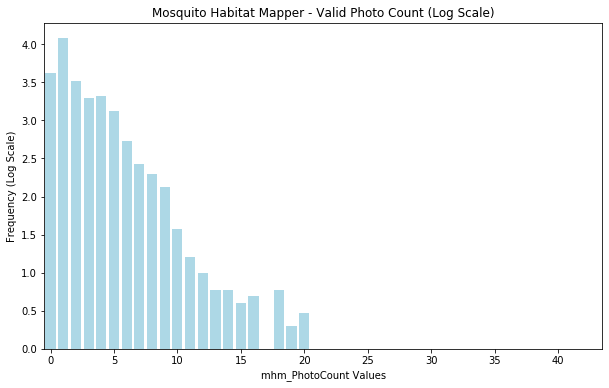

In [17]:
plot.plot_freq_bar(mhm_df, "Mosquito Habitat Mapper", "mhm_PhotoCount","Valid Photo Count",log_scale=True)

### Rejected Photos

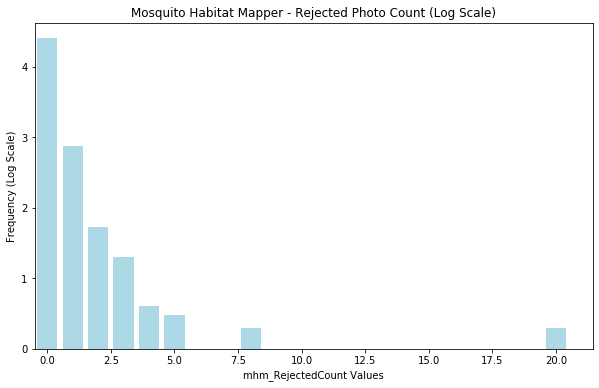

In [18]:
plot.plot_freq_bar(mhm_df, "Mosquito Habitat Mapper", "mhm_RejectedCount","Rejected Photo Count",log_scale=True)

### Pending Photo Count

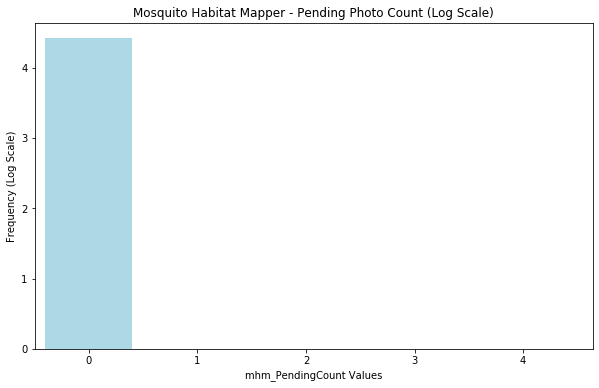

In [19]:
plot.plot_freq_bar(mhm_df, "Mosquito Habitat Mapper", "mhm_PendingCount","Pending Photo Count",log_scale=True)

### Multiple Bar Graph

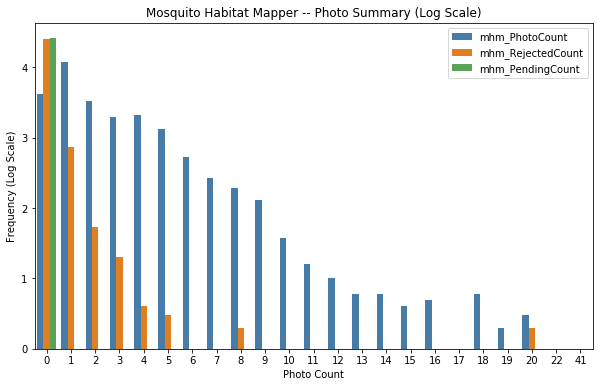

In [20]:
plot.multiple_bar_graph(mhm_df, "Mosquito Habitat Mapper", ["mhm_PhotoCount","mhm_RejectedCount","mhm_PendingCount"],"Photo Summary",log_scale=True)

### Photo Subject Frequency

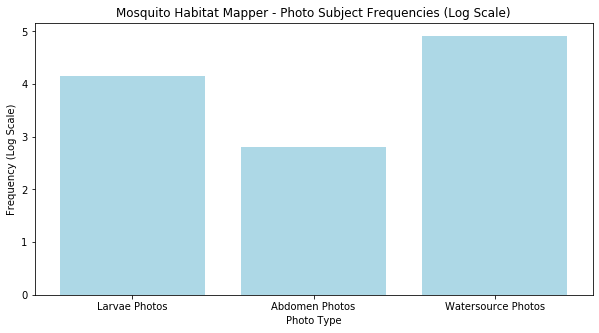

In [21]:
mhm.photo_subjects(mhm_df)

## Completeness Scores

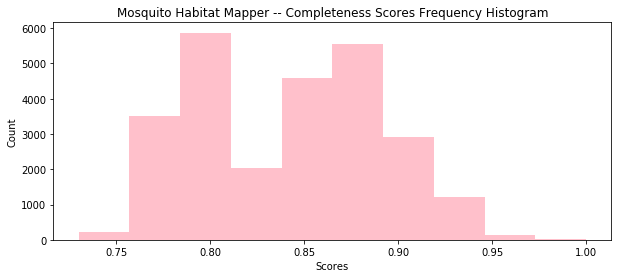

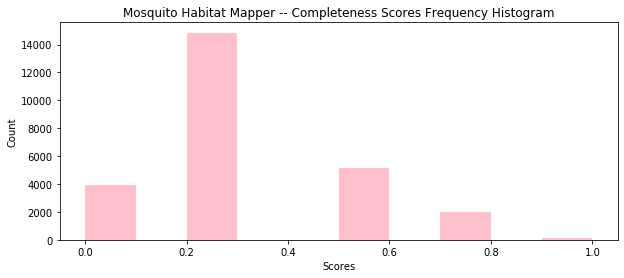

In [22]:
plot.completeness_histogram(
        mhm_df,
        "Mosquito Habitat Mapper",
        "mhm_CumulativeCompletenessScore",
        "Cumulative Completeness",
    )
plot.completeness_histogram(
        mhm_df,
        "Mosquito Habitat Mapper",
        "mhm_SubCompletenessScore",
        "Sub Completeness",
    )

## Diagnostic Plots

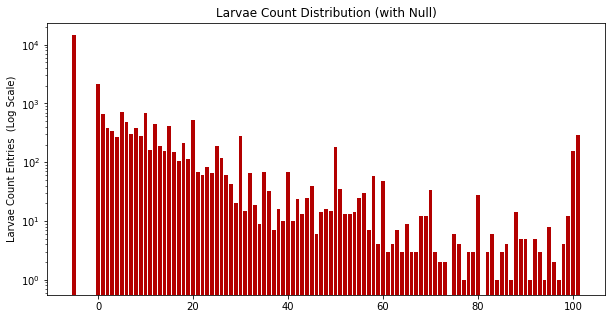

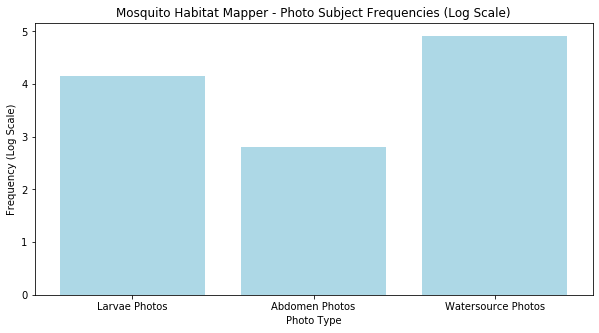

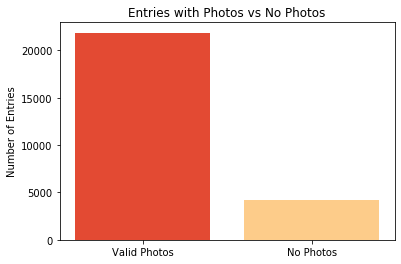

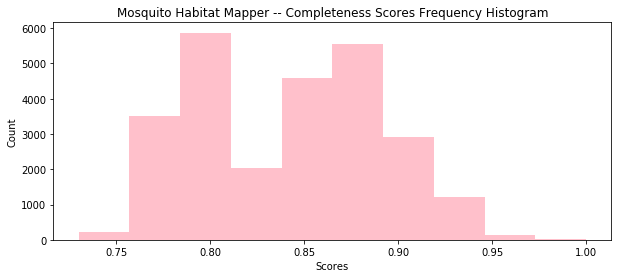

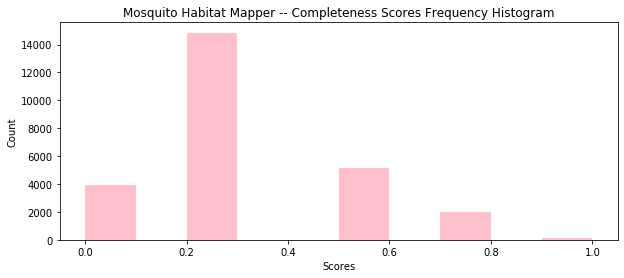

In [23]:
mhm.diagnostic_plots(mhm_df)

## TODO
- [ ] CSV Download
- [ ] Filtering by parameters
- [ ] Add more distribution plots
- [ ] Add Labels to cleanup steps